# Hyperparameter Optimisation

## Mean Squared Error

A linear model is one of the simplest regression techniques, but it captures all the key aspects of
data-driven modelling and machine learning. You are given a set of data: usually, you have
a (or more) predictor $x$ and a predictand $y$. We may believe that $x$ and $y$ have a linear relationship
between them, i.e. if I increase $x$ by a certain amount $y$ increases linearly, and vice-versa. This
relationship is often described with the following equation:

$$ y = mx + c $$

where $m$ is the slope of the linear relationship and $c$ is the intercept. In machine learning literature,
you may find that they denote the slope as weight and the intercept as bias.

Now, of course, if someone is simply giving us the data – a bunch of measurements of $y$'s for
respective $x$'s – we do not quite know the original $m$ and $c$ of the model, so we cannot exactly predict
the outcome $y$ for an unknown $x$. To make matters further complicated, the data we are given often
has noise, as in we cannot exactly measure the predictand and thus the values we got from our
measurements are slightly off. So, we want to locate an appropriate set of values for $m$ and $c$ such
that we fit the data best. To fit the data best, we often try out various different $m$'s and $c$'s, and
return the values for which we received the lowest ***mean squared error***. The whole idea is that if
we can correctly (or with a small error) predict the $y$'s for the given $x$'s, then we should be able to
make good predictions of $y$'s for unseen $x$'s. The predictions from the model are often denoted as $\hat{y}$'s
to distinctly identify them from given $y$'s, which are the measured responses for various $x$'s.
Clearly this is an optimisation problem. In this context, our independent variables are $\mathbf{\theta} = (m,c)^\top$ and the optimisation problem is:

$$ \min_\theta f(\mathbf{\theta}) = \sum_{i=1}^M (y_i - \hat{y}_i)^2 = \sum_{i=1}^M (y_i - mx_i - c)^2$$

when you are given $m$ data points.

The following is an implementation of the mean squared error function using the following training $X$ and label $Y$ datasets.

$$ 
X =
\begin{bmatrix}
1 \\ 2 \\ 3 \\ 4 \\ 5
\end{bmatrix};
\hspace{5mm}
Y =
\begin{bmatrix}
2 \\ 4 \\ 5 \\ 4 \\ 5
\end{bmatrix}
$$

In [66]:
""" Utility functions + imports """

import itertools
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(truth, preds):
  assert len(truth) == len(preds), "Unequal length of truth and predictions datasets"
  sqe = (truth - preds) ** 2
  return 1/len(truth) * sum(sqe)

def permutate(mx):
  keys, values = zip(*mx.items())
  return [dict(zip(keys, v)) for v in itertools.product(*values)]

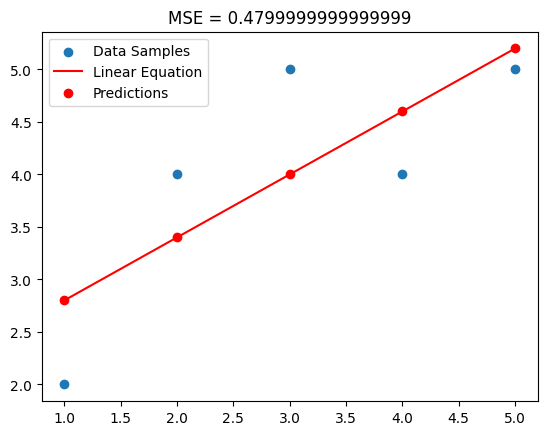

In [67]:
training = np.arange(1, 6)
labels = np.array([2, 4, 5, 4, 5])

class SimpleRegression:
  def __init__(self, m, c=0):
    self.m = m
    self.c = c

  def predict(self, X):
    return self.m * X - self.c

  def __repr__(self):
    return f"<SimpleRegression m={self.m} c={self.c}>"

simple_reg = SimpleRegression(m=0.6, c=-2.2)

plt.scatter(training, labels, label="Data Samples")
interval = np.array([min(training), max(training)])  # for plotting
plt.plot(interval, simple_reg.predict(interval), "r-", label="Linear Equation")

preds = simple_reg.predict(training)

plt.scatter(training, preds, c="red", label="Predictions")
plt.title(f"MSE = {mean_squared_error(labels, preds)}")
plt.legend()
plt.show()

## Grid Search

In [68]:
class SimpleGridSearch:
  def search(self, mx, model_class):
    perms = permutate(mx)
    lowest = np.inf
    for hyperparams in perms:
      model = model_class(**hyperparams)
      preds = model.predict(training)
      err = mean_squared_error(labels, preds)
      if err < lowest:
        lowest = err
        best = model
    return best

best = SimpleGridSearch().search({
  "m": np.linspace(-10, 10, 100),
  "c": np.linspace(-10, 10, 100),
}, SimpleRegression)

print(f"Best model = {best}")

Best model = <SimpleRegression m=0.5050505050505052 c=-2.525252525252525>
